# KMeans

## Лабораторная работа №3

Присвойте строку с вашим ФИО переменной `name` и выполните ячейку. В ее выводе будет указан номер вашего варианта.

In [1]:
name = "Шатаров Кирилл Александрович"

def calculate_variant(name):
    return sum(ord(char) for char in name) % 2 + 1

print(f"Ваш вариант - №{calculate_variant(name)}")


Ваш вариант - №2



---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Шатаров Кирилл Александрович

Группа: 211-365

Вариант: №2

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/kmeans-1.csv
1. http://labcolor.space/kmeans-2.csv

Скопируйте ссылку для своего варианта.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

## Чтение данных

Используя уже знакомый метод из библиотеки Pandas, считайте данные в формате csv по ссылке из вашего варианта в датафрейм.

Изучите ваш датасет: сколько в нем объектов, сколько признаков, в каких диапазонах изменяются признаки, есть ли в данных целевой признак.

In [3]:
df = pd.read_csv('http://labcolor.space/kmeans-2.csv')

In [5]:
df.head()

,370.0,372.4161073825503,374.8322147651007,377.248322147651,379.66442953020135,382.08053691275165,384.496644295302,386.9127516778523,389.3288590604027,391.744966442953,...,708.255033557047,710.6711409395973,713.0872483221476,715.5033557046979,717.9194630872483,720.3355704697987,722.7516778523491,725.1677852348994,727.5838926174497,730.0
0,1.643832,1.653974,1.664258,1.675012,1.685943,1.696479,1.708183,1.719613,1.731656,1.731949,...,0.229817,0.246031,0.260585,0.273004,0.286049,0.309913,0.330690,0.348017,0.363368,0.377831
1,1.737076,1.744759,1.752590,1.761497,1.770919,1.781013,1.791797,1.802723,1.814381,1.813813,...,0.328683,0.326381,0.322892,0.318671,0.315746,0.325096,0.333038,0.339213,0.344198,0.349475
2,1.636177,1.633219,1.631048,1.631170,1.632342,1.635748,1.641488,1.648256,1.657382,1.656845,...,0.291181,0.291451,0.290297,0.287757,0.286022,0.296141,0.304621,0.310407,0.315660,0.320008
3,1.666198,1.682622,1.698907,1.715742,1.732075,1.748684,1.764595,1.780162,1.795426,1.797943,...,0.377852,0.375992,0.372284,0.366987,0.361945,0.368278,0.373567,0.375289,0.376614,0.376420
4,1.654927,1.653515,1.652116,1.651377,1.650935,1.650776,1.652101,1.653049,1.655286,1.647188,...,0.261426,0.260837,0.258872,0.254642,0.251743,0.260160,0.267018,0.271899,0.276467,0.280374


In [4]:
df.shape

(80, 150)

In [6]:
df.describe()

,370.0,372.4161073825503,374.8322147651007,377.248322147651,379.66442953020135,382.08053691275165,384.496644295302,386.9127516778523,389.3288590604027,391.744966442953,...,708.255033557047,710.6711409395973,713.0872483221476,715.5033557046979,717.9194630872483,720.3355704697987,722.7516778523491,725.1677852348994,727.5838926174497,730.0
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.979670,0.981397,0.984054,0.987103,0.990156,0.993836,0.998397,1.003042,1.008358,1.006987,...,1.001307,0.998017,0.994112,0.989741,0.986050,0.989658,0.991478,0.989219,0.987548,0.985849
std,0.736172,0.737652,0.739094,0.740929,0.743104,0.745420,0.747907,0.750496,0.753590,0.751772,...,0.788050,0.788410,0.789719,0.792078,0.794061,0.790729,0.786894,0.780644,0.775597,0.771149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244692,0.252491,0.261754,0.265595,0.267354,0.270092,0.275081,0.269697,0.272831,0.268470,...,0.264574,0.263102,0.260936,0.256628,0.254779,0.263538,0.269972,0.266905,0.264801,0.262116
50%,0.988965,0.991635,0.995020,0.998552,1.001024,1.004065,1.007607,1.011000,1.014308,1.010384,...,0.401366,0.399032,0.394822,0.383237,0.371835,0.375681,0.381975,0.391916,0.401895,0.411956
75%,1.678961,1.687208,1.699924,1.708823,1.712280,1.714856,1.724840,1.735440,1.746327,1.746842,...,1.811257,1.806093,1.806899,1.801259,1.794684,1.790806,1.790046,1.786441,1.782557,1.778888
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [12]:
df.columns

Index(['370.0', '372.4161073825503', '374.8322147651007', '377.248322147651',
       '379.66442953020135', '382.08053691275165', '384.496644295302',
       '386.9127516778523', '389.3288590604027', '391.744966442953',
       ...
       '708.255033557047', '710.6711409395973', '713.0872483221476',
       '715.5033557046979', '717.9194630872483', '720.3355704697987',
       '722.7516778523491', '725.1677852348994', '727.5838926174497', '730.0'],
      dtype='object', length=150)

**Опишите ваши данные.**

Сколько в нем объектов: **80**

Сколько признаков: **150**

В каких диапазонах изменяются признаки: **от 0 до 2**

Есть ли в данных целевой признак: **нет**

## Кластеризация

Когда решалась задача классификации с помощью алгоритма knn в наших данных был целевой признак, по которому можно было определить количество классов. При решении задачи кластеризации мы заранее не имеем информации, по которой мы можем задать количество кластеров, поэтому пока при создании экземпляра объекта выберите количество кластеров до 20. Не забудьте задать `random_state`.

In [16]:
# Импортируйте класс из соответствующего модуля библиотеки sklearn
from sklearn.cluster import KMeans

# n_init - Сколько раз алгоритм k-средних запускается с разными начальными значениями центроида.
kmeans = KMeans(init='k-means++',
                n_init=10,
                n_clusters=5,
                max_iter=300,
                random_state=42,
                )
kmeans.fit(df)

KMeans(n_clusters=5, n_init=10, random_state=42)

Опишите своими словами за что отвечают параметры:

**n_clusters** - Число кластеров. Устанавливает k для шага кластеризации.

**init** - Контролирует технику инициализации центроидов. «k-means++» инициализирует центроиды удаленными друг от друга, что, вероятно, приводит к лучшим результатам, чем случайная инициализация «random», этот метод ускоряет сходимость.

**n_init** - Устанавливает количество выполняемых инициализаций, т. е. сколько раз алгоритм k-средних запускается с разными начальными значениями центроида.

**max_iter** - Задает количество максимальных итераций для каждой инициализации алгоритма k-средних.

**random_state** - Определяет генерацию случайных чисел для инициализации центроида.

После выполнения метода `.fit()` у экземпляра оценщика (estimator) доступны атрибуты `labels_` и `inertia_`.

`labels_` - массив с указаниями индексов кластеров для всех ваших объектов.

Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**   
**Ваш ответ**:   
0 кластер: 9 объектов   
1 кластер: 24 объектов   
2 кластер: 18 объектов   
3 кластер: 16 объектов   
4 кластер: 13 объектов   

In [20]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 4, 4,
       0, 4, 4, 4, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
# Получаем метки кластеров
labels = kmeans.labels_

# Подсчитываем количество объектов в каждом кластере
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Количество объектов в каждом кластере:", cluster_counts)

Количество объектов в каждом кластере: {0: 9, 1: 24, 2: 18, 3: 16, 4: 13}


`inertia_` для KMeans это SSD (Sum of squared distances - сумма квадратов расстояний) или по-другому это еще называют SSE (Sum of Squares Error - сумма квадратов ошибки.)

Если SSD это сумма квадратов расстояний, то между чем и чем рассчитываются расстояния?

**Ваш ответ**: Сумма квадратов расстояний рассчитывается от каждой точки данных до центра своего кластера.

In [23]:
inertia_value = kmeans.inertia_

print("Сумма квадратов расстояний (inertia):", inertia_value)

Сумма квадратов расстояний (inertia): 91.7903510712222


## Подбор количества кластеров

Для подбора оптимального количества кластеров мы воспользуемся графическим методом - "методом локтя" (Elbow Method). Для этого мы создаем множество моделей с разным количеством кластеров, "подгоняем" (fit) их и оцениваем SSD.

Гипотеза, которая позволяет использовать данный метод, заключается в том, что центройд является прототипом кластера, а следовательно объекты должны кучнее располагаться к нему, поэтому сумма квадратов расстояний должна быть меньше.

**А в каком случае для k средних (KMeans) оцениваемые расстояния равны 0?**

**Ваш ответ:** Оцениваемые расстояния становятся равными 0 в том случае, если центры кластеров совпадают с точками данных, либо количество кластеров равно количеству объектов.

Теперь ваша задача в цикле создать n моделей и записать их критерий (сумму квадратов расстояний) в словарь (dict).

In [43]:
SSE = {}

kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

for k in np.arange(2, 21):  # # Ваш код: в arange укажите в качестве начального значения 2, а конечного число до 20.
  cluster = KMeans(n_clusters=k, **kmeans_kwargs)
  cluster.fit(df)
  SSE[k] = cluster.inertia_

Построим график для оценки, где по оси абсцисс указано количество кластеров, а по оси ординат указано значение, которое описывает сумму квадратов расстояний.

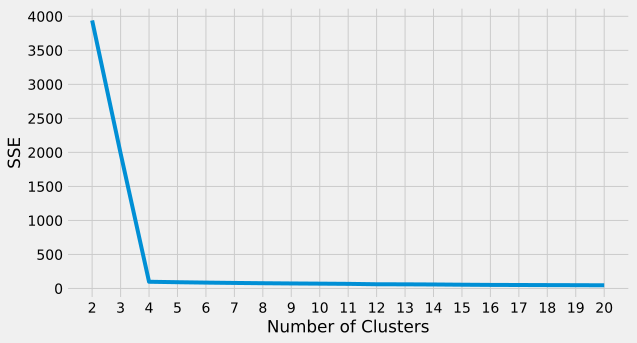

In [44]:
plt.figure(figsize=(9, 5))

lists = SSE.items()
x, y = zip(*lists)
plt.plot(x, y)

plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Теперь по графику найдите число кластеров, начиная с которого критерий SSD снижается не так быстро.

Получившееся число кластеров - **4**.

## Итоговая модель

In [45]:
# Создайте финальный вариант модели с подобраным количеством кластеров и обучите ее.

kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'n_clusters': 4,
    'max_iter': 300,
    'random_state': 42,
}

final_model = KMeans(**kmeans_kwargs)
final_model.fit(df)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [50]:
claster_count = 4

points = list(final_model.labels_)
for i in range(claster_count):
  print(f"Объектов в {i} кластере – {points.count(i)}")

Объектов в 0 кластере – 16
Объектов в 1 кластере – 24
Объектов в 2 кластере – 18
Объектов в 3 кластере – 22


In [46]:
# Получаем метки кластеров
labels_fm = final_model.labels_

# Подсчитываем количество объектов в каждом кластере
unique, counts = np.unique(labels_fm, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Количество объектов в каждом кластере:", cluster_counts)

Количество объектов в каждом кластере: {0: 16, 1: 24, 2: 18, 3: 22}


Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**

**Ваш ответ**:   
0 кластер: 16 объектов   
1 кластер: 24 объектов   
2 кластер: 18 объектов   
3 кластер: 22 объектов   

**Кратко опишите суть алгоритма KMeans.**

**Ваш ответ:**

1. Инициализация центров кластеров: Случайным образом выбираются начальные центры кластеров.
2. Присваивание точек к ближайшим кластерам: Каждая точка данных присваивается к ближайшему центру кластера. Расстояние между точками и центрами обычно измеряется евклидовым расстоянием.
3. Пересчет центров кластеров: Для каждого кластера пересчитывается его центр путем вычисления среднего значения всех точек, принадлежащих этому кластеру.
4. Повторение шагов 2-3: Шаги 2 и 3 повторяются до тех пор, пока центры кластеров не стабилизируются или не достигнут критерия останова. Как только высчитанные центры кластеров совпадут с предыдущими, алгоритм будет окончен.
5. Финальные метки кластеров: После завершения алгоритма каждой точке данных присваивается окончательная метка кластера на основе ближайшего центра.